# PIMA Indian Diabetes Prediction

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.\
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
All patients are female\

Pregnancies: - Number of times pregnant\
Glucose: - The blood plasma glucose concentration after a 2 hour oral glucose tolerance test.\
BloodPressure: -  Diastolic blood pressure (mm/HG).\
SkinThickness: -  Skinfold thickness of the triceps (mm).\
Insulin: - 2 hour serum insulin (mu U/ml).\
BMI: - Body mass index (kg/m squared)\
DiabetesPedigreeFunction: - A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.\
Age: -Age (years)\
Outcome : -  Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no).\
A value of ‘0’ does not necessarily mean it is a missing value. For example: A woman has a zero record of pregnancies because that woman has not been pregnant.This is one example on how careful you have to be when preprocessing your data for missing values. Zero does not mean it is missing.


In [1]:
import pandas as pd
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<AxesSubplot:>

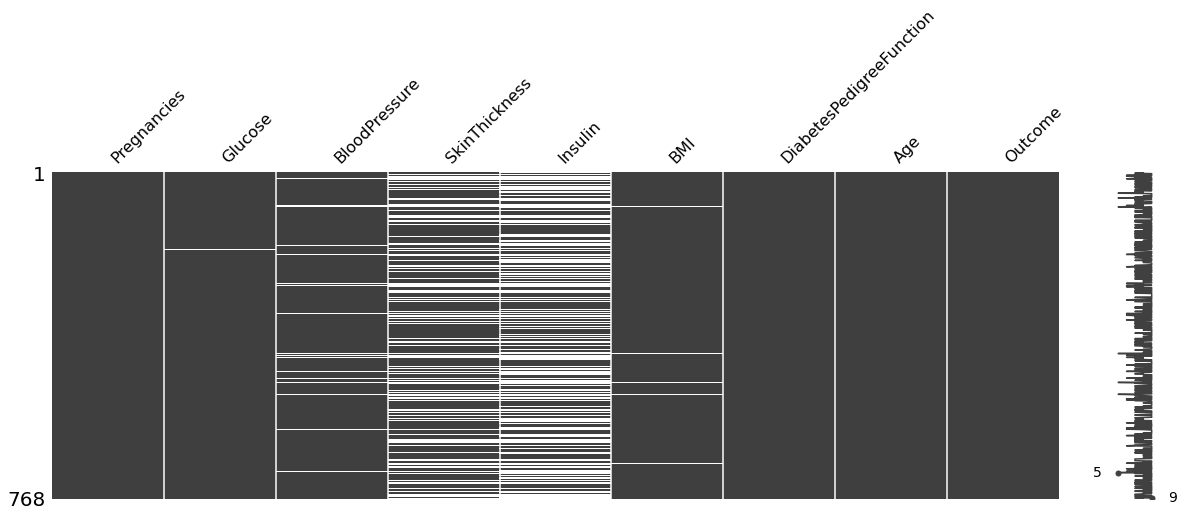

In [7]:
mno.matrix(df, figsize = (20, 6))

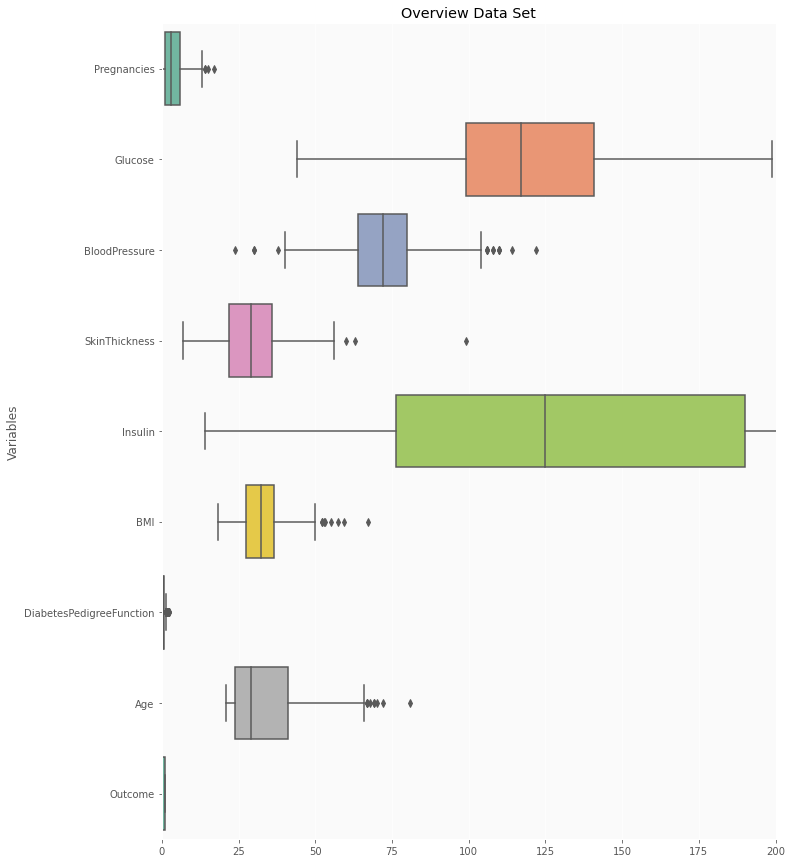

In [8]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

<AxesSubplot:>

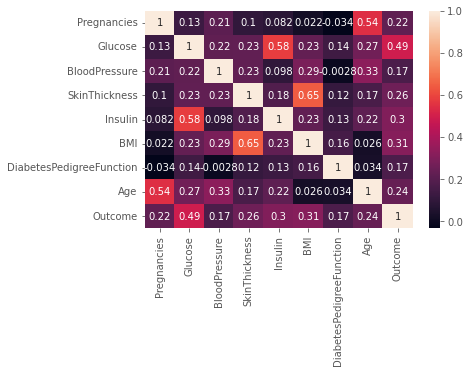

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [10]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False,False


In [11]:
df.shape

(768, 9)

In [12]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#df

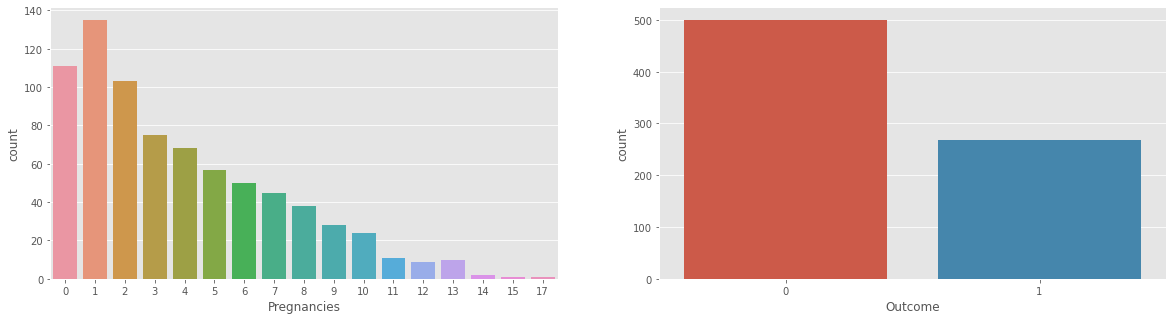

In [13]:
cat_cols = ['Pregnancies','Outcome']
i=0
while i < 2:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

Most of the Female Pregnant Zero,one,two or three Number of times.
Number of Female have Diabetes(1) are less than Number of Female not have Diabetes(0).

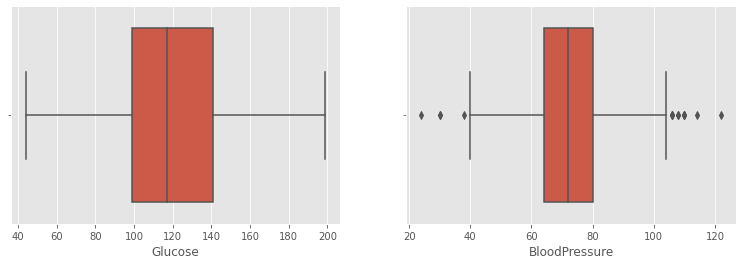

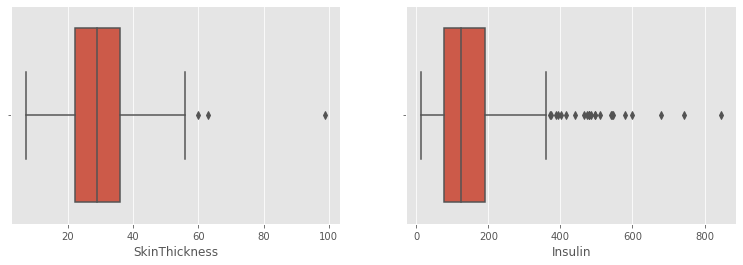

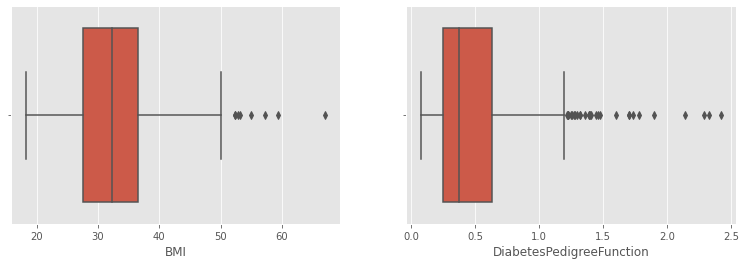

In [14]:
num_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
i=0
while i < 6:
    fig = plt.figure(figsize=[13,4])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
        
    plt.show()

In [15]:
df.sort_values(by="Age",ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
453,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0
666,4,145.0,82.0,18.0,NaN,32.5,0.235,70,1
123,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0
...,...,...,...,...,...,...,...,...,...
240,1,91.0,64.0,24.0,NaN,29.2,0.192,21,0
136,0,100.0,70.0,26.0,50.0,30.8,0.597,21,0
382,1,109.0,60.0,8.0,182.0,25.4,0.947,21,0
392,1,131.0,64.0,14.0,415.0,23.7,0.389,21,0


In [16]:
df[df['Age'] > df['Age'].quantile(0.99)].sort_values(by="Age",ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
453,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0
666,4,145.0,82.0,18.0,NaN,32.5,0.235,70,1
123,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0
674,8,91.0,82.0,NaN,NaN,35.6,0.587,68,0


In [17]:
df[df['Pregnancies'] > df['Pregnancies'].quantile(0.99)].sort_values(by="Pregnancies",ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,NaN,33.6,0.212,38,1


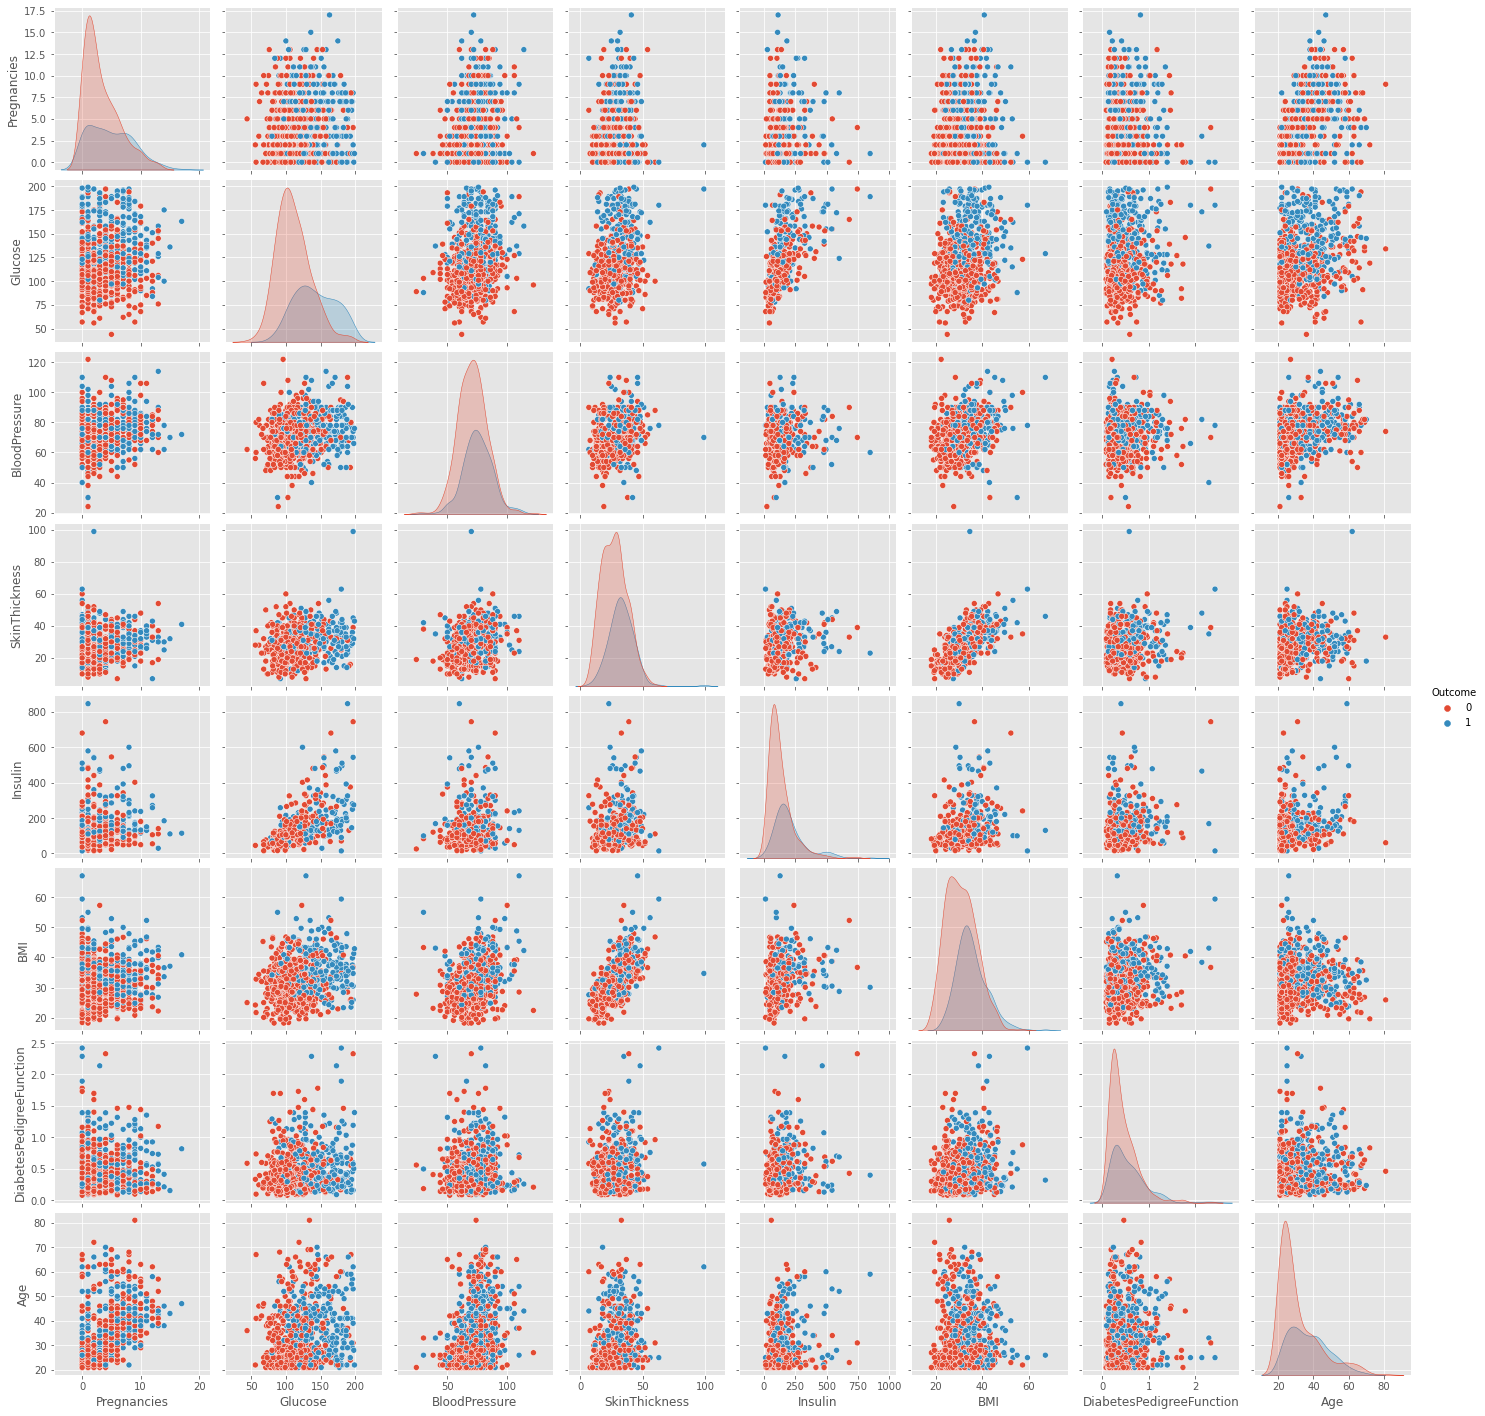

In [18]:
sns.pairplot(df, hue = "Outcome")

In [19]:
Up=df["Pregnancies"].unique()
Up

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

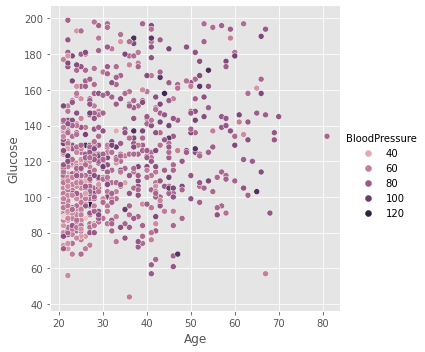

In [20]:
sns.relplot(x=df.Age,y=df.Glucose,hue=df.BloodPressure)

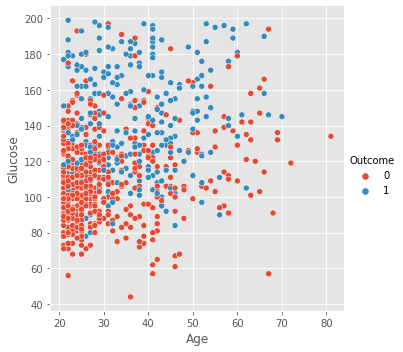

In [21]:
sns.relplot(x=df.Age,y=df.Glucose,hue=df.Outcome)

<AxesSubplot:ylabel='Outcome'>

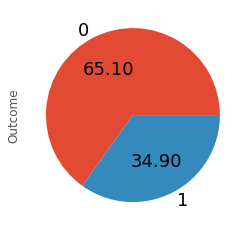

In [22]:
df.Outcome.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

In [23]:
def _status_calc(y):
    if y <18.5:
        z='Underweight'
    elif 18.5<=y<25:
        z='Normal or Healthy Weight'
    elif 25 <=y <30:
        z='OverWeight'
    else:
        z='Obese'
    return z
df['BMI_status']=df['BMI'].apply(_status_calc)

In [24]:
diab_groups1=df.groupby('BMI_status').agg({'Outcome':['sum']})
diab_groups1.reset_index()
diab_groups1.columns=['postive_outcomes']
diab_groups1['total_outcomes']=df.groupby('BMI_status').size()

In [25]:
diab_groups1

,postive_outcomes,total_outcomes
BMI_status,,
Normal or Healthy Weight,7,102
Obese,221,483
OverWeight,40,179
Underweight,0,4


In [26]:
diab_groups2=df.groupby('BMI_status').agg({'BloodPressure':['mean','min','max']})
diab_groups2

BloodPressure             
                                  mean   min    max
BMI_status                                         
Normal or Healthy Weight     67.917526  38.0  122.0
Obese                        74.486957  30.0  114.0
OverWeight                   69.436047  24.0  110.0
Underweight                  69.500000  64.0   76.0